### This notebook shows how to load Matlab files containing a parameter sweep cross-shore energy flux values at the off-shore boundary over variable pycnocline widths and depths, and how to plot these results. The paper contains results for two forcing frequencies: $\omega=1.25f=1.16\times 10^{-4}s^{-1}$ and $\omega=1.5f=1.41\times 10^{-4}s^{-1}$. This notebook only shows the second frequency, which is the $M_2$ tidal frequency.

The specifications are as follows:

- topography parameters: shelf width  𝑥𝑠=80 km, slope width  𝑊=32 km, domain width  𝐿=800 km, deep ocean depth  ℎ0=3100 m, depth at the coast  ℎ𝑐=100 m, depth at the shelf break  ℎ𝑠=150 m;
- forcing: Baines body force on pressure 
- Coriolis parameter: $f=9.3\times 10^{-5}s^{-1}$

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.io import loadmat

Open Matfile using loadmat module and extract all the data from the loaded dictionary.

In [2]:
flux_data = loadmat('../data/up_sweep_M2.mat')

In [3]:
#SET-UP VARIABLES
Nx = flux_data['Nx'] #number of grid points in x: size[1,]
Nz = flux_data['Nz'] #number of grid points in z: size[1,]
xx = flux_data['xx'] #grid in x
z = flux_data['z'] #grid in z
zpyc = flux_data['zpyc_vec'] #vector of pycnocline depth values (m): size[nd,]
mupyc = flux_data['mupyc_vec'] #vector of pycnocline width values (m): size[nw,]

In [4]:
#OUTPUT VARIABLES
XFlux_offshore_sweep = flux_data['XFlux_offshore_sweep']
            #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary: size[nd,nw]
XFlux_sweep = flux_data['XFlux_sweep']
            #value of vertically-integrated cross-shore energy flux (W/m): size[Nx/2,nd,nw]:
up_mode_sweep = flux_data['up_mode_sweep']
            #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary 
            #for each vertical mode (1:Nz-1): size[Nz-1,nd,nw]
mode1_sweep = flux_data['mode1_sweep']
            #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary for vertical mode 1:
            #size[nd,nw]
mode2_sweep = flux_data['mode2_sweep']
            #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary for vertical mode 2:
            #size[nd,nw]
mode3_sweep = flux_data['mode3_sweep']
            #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary for vertical mode 3:
            #size[nd,nw]
mode4_sweep = flux_data['mode4_sweep']
            #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary for vertical mode 4:
            #size[nd,nw]
mode5_sweep = flux_data['mode5_sweep']
            #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary for vertical mode 5:
            #size[nd,nw]
mode6_sweep = flux_data['mode6_sweep']
            #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary for vertical mode 6:
            #size[nd,nw]
max_mode_sweep = flux_data['max_mode_sweep']
            #mode number of the vertical mode with the largest value of cross-shore energy flux (W/m) 
            #at the off-shore boundary: size[nd,nw]
max_mode_val_sweep = flux_data['max_mode_val_sweep']
            #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary 
            #for the vertical mode with the largest flux value: size[nd,nw]

First, we will plot vertially-integrated cross-shore energy flux $<up>$ as a function of pycnocline depth $Z_{pyc}$ and pycnocline width $\mu_{pyc}$. We only consider cases where $\mu_{pyc}\leq Z_{pyc}$.

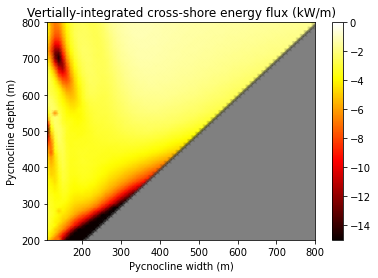

In [6]:
fig, ax0 = plt.subplots()
im = ax0.pcolormesh(mupyc.reshape(mupyc.shape[1],),zpyc.reshape(zpyc.shape[1],),
                    XFlux_offshore_sweep/1e3,
                    shading='gouraud',
                   cmap=plt.get_cmap('hot'),vmin=-15, vmax=0)
fig.colorbar(im, ax=ax0)
ax0.set_facecolor('gray')
ax0.set_title('Vertially-integrated cross-shore energy flux (kW/m)')
ax0.set_xlabel('Pycnocline width (m)')
ax0.set_ylabel('Pycnocline depth (m)');
ax0.set_xlim((110,800));

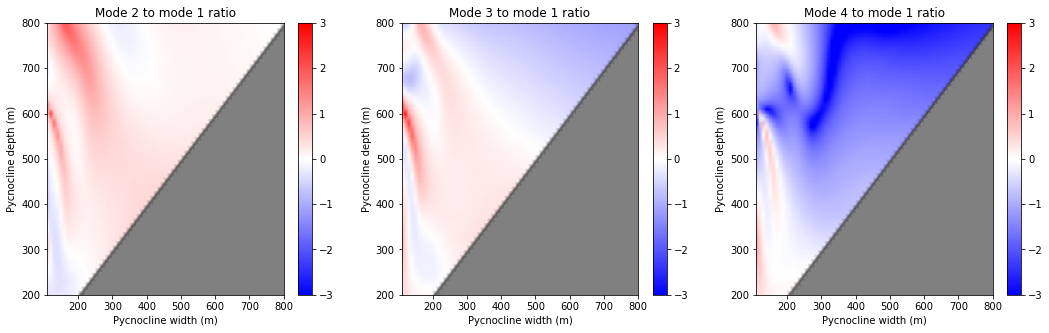

In [8]:
fig, (ax0,ax1,ax2) = plt.subplots(ncols=3)
im = ax0.pcolormesh(mupyc.reshape(mupyc.shape[1],),zpyc.reshape(zpyc.shape[1],),
                    np.log10(mode2_sweep/mode1_sweep),
                    shading='gouraud',
                   cmap=plt.get_cmap('bwr'),vmin=-3, vmax=3)
fig.colorbar(im, ax=ax1)
ax0.set_facecolor('gray')
ax0.set_title('Mode 2 to mode 1 ratio')
ax0.set_xlabel('Pycnocline width (m)')
ax0.set_ylabel('Pycnocline depth (m)');
ax0.set_xlim((110,800))

im = ax1.pcolormesh(mupyc.reshape(mupyc.shape[1],),zpyc.reshape(zpyc.shape[1],),
                    np.log10(mode3_sweep/mode1_sweep),
                    shading='gouraud',
                   cmap=plt.get_cmap('bwr'),vmin=-3, vmax=3)
fig.colorbar(im, ax=ax0)
ax1.set_facecolor('gray')
ax1.set_title('Mode 3 to mode 1 ratio')
ax1.set_xlabel('Pycnocline width (m)')
ax1.set_ylabel('Pycnocline depth (m)');
ax1.set_xlim((110,800))

im = ax2.pcolormesh(mupyc.reshape(mupyc.shape[1],),zpyc.reshape(zpyc.shape[1],),
                    np.log10(mode4_sweep/mode1_sweep),
                    shading='gouraud',
                   cmap=plt.get_cmap('bwr'),vmin=-3, vmax=3)
fig.colorbar(im, ax=ax2)
ax2.set_facecolor('gray')
ax2.set_title('Mode 4 to mode 1 ratio')
ax2.set_xlabel('Pycnocline width (m)')
ax2.set_ylabel('Pycnocline depth (m)');
ax2.set_xlim((110,800))

plt.rcParams['figure.figsize'] = [18, 5]

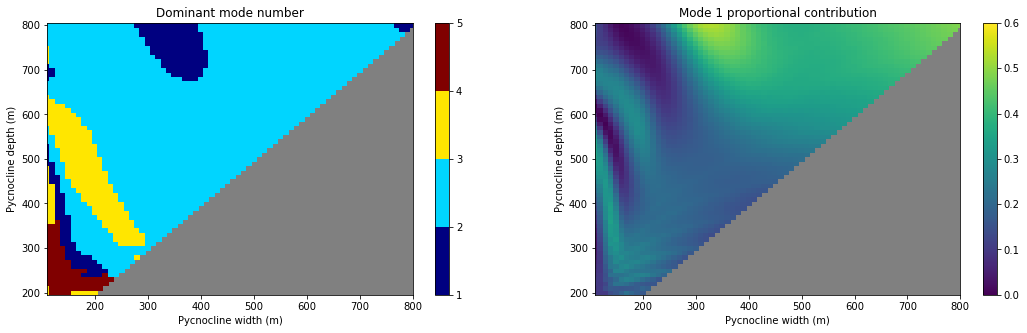

In [9]:
fig, (ax0,ax1) = plt.subplots(ncols=2)


cmap = plt.cm.jet  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(1, 5, 5)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

im = ax0.pcolormesh(mupyc.reshape(mupyc.shape[1],),zpyc.reshape(zpyc.shape[1],),
                    max_mode_sweep,
                    shading='auto',
                   cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0,ticks=bounds, boundaries=bounds,format='%1i')
ax0.set_facecolor('gray')
ax0.set_title('Dominant mode number')
ax0.set_xlabel('Pycnocline width (m)')
ax0.set_ylabel('Pycnocline depth (m)');
ax0.set_xlim((110,800))

im = ax1.pcolormesh(mupyc.reshape(mupyc.shape[1],),zpyc.reshape(zpyc.shape[1],),
                    mode1_sweep/XFlux_offshore_sweep,
                    shading='auto',
                   cmap=plt.get_cmap('viridis'),vmin=0, vmax=0.6)
fig.colorbar(im, ax=ax1)
ax1.set_facecolor('gray')
ax1.set_title('Mode 1 proportional contribution')
ax1.set_xlabel('Pycnocline width (m)')
ax1.set_ylabel('Pycnocline depth (m)');
ax1.set_xlim((110,800));